In [1]:
# prompt: calcula el día y hora en que la distancia entre la tierra y marte es mínima
!pip install skyfield
import datetime
import numpy as np
from skyfield.api import load, Topos

# Cargar los datos de efemérides
planets = load('de421.bsp')
earth, mars = planets['earth'], planets['mars']

# Definir el rango de fechas para buscar la mínima distancia
start_date = datetime.date(2025, 1, 1)
end_date = datetime.date(2026, 1, 1)
time_step = datetime.timedelta(days=1)

min_distance = float('inf')
closest_approach_time = None

current_date = start_date
while current_date < end_date:
  ts = load.timescale()
  t = ts.utc(current_date.year, current_date.month, current_date.day)
  astrometric = earth.at(t).observe(mars)
  distance = astrometric.distance().au

  if distance < min_distance:
    min_distance = distance
    closest_approach_time = t

  current_date += time_step

print(f"La distancia mínima entre la Tierra y Marte es de {min_distance:.2f} UA.")
print(f"Ocurrirá alrededor del {closest_approach_time.utc_datetime()}.")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 367.0/367.0 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 234.5/234.5 kB 13.9 MB/s eta 0:00:00


[#################################] 100% de421.bsp


La distancia mínima entre la Tierra y Marte es de 0.64 UA.
Ocurrirá alrededor del 2025-01-13 00:00:00+00:00.


In [2]:
# prompt: calcula la ecuacion de la elipse que describe la tierra alrededor del sol, siendo el sol uno de los focos

import numpy as np

# Datos aproximados (en millones de kilómetros)
semi_eje_mayor = 149.6 #Distancia media Sol-Tierra
excentricidad = 0.0167

# Calcular el semi-eje menor
semi_eje_menor = semi_eje_mayor * np.sqrt(1 - excentricidad**2)

# Calcular la distancia del centro de la elipse a cada foco
distancia_foco = semi_eje_mayor * excentricidad

# Suponiendo que el Sol está en uno de los focos, en el origen (0,0)
# La ecuación de la elipse es:
# (x - h)^2 / a^2 + (y - k)^2 / b^2 = 1
# Donde:
# a = semi-eje mayor
# b = semi-eje menor
# (h, k) = coordenadas del centro de la elipse

# En nuestro caso, el centro de la elipse se encuentra a una distancia 'distancia_foco' del Sol (origen)
# Supongamos que la elipse se encuentra en el eje x
h = distancia_foco
k = 0

# La ecuación de la elipse para la Tierra alrededor del Sol, con el sol en uno de los focos es:
# (x - distancia_foco)^2 / semi_eje_mayor^2 + y^2 / semi_eje_menor^2 = 1


print(f"La ecuación de la elipse es: (x - {h:.2f})^2 / ({semi_eje_mayor:.2f})^2 + y^2 / ({semi_eje_menor:.2f})^2 = 1")

# Nota: Las unidades son millones de kilómetros.
# La ecuación proporciona una aproximación de la órbita. La órbita real de la Tierra no es una elipse perfecta debido a las interacciones gravitatorias de otros planetas.


La ecuación de la elipse es: (x - 2.50)^2 / (149.60)^2 + y^2 / (149.58)^2 = 1


In [3]:
# prompt: calcula la ecuacion de la elipse que describe marte alrededor del sol, siendo el sol uno de los focos

import numpy as np
# Datos aproximados para Marte (en millones de kilómetros)
semi_eje_mayor_marte = 228.0
excentricidad_marte = 0.0934

# Calcular el semi-eje menor
semi_eje_menor_marte = semi_eje_mayor_marte * np.sqrt(1 - excentricidad_marte**2)

# Calcular la distancia del centro de la elipse a cada foco
distancia_foco_marte = semi_eje_mayor_marte * excentricidad_marte

# Suponiendo que el Sol está en uno de los focos, en el origen (0,0)
# La ecuación de la elipse es:
# (x - h)^2 / a^2 + (y - k)^2 / b^2 = 1
# Donde:
# a = semi-eje mayor
# b = semi-eje menor
# (h, k) = coordenadas del centro de la elipse

# En nuestro caso, el centro de la elipse se encuentra a una distancia 'distancia_foco' del Sol (origen)
# Supongamos que la elipse se encuentra en el eje x
h_marte = distancia_foco_marte
k_marte = 0

# La ecuación de la elipse para Marte alrededor del Sol, con el sol en uno de los focos es:
# (x - distancia_foco_marte)^2 / semi_eje_mayor_marte^2 + y^2 / semi_eje_menor_marte^2 = 1

print(f"La ecuación de la elipse para Marte es: (x - {h_marte:.2f})^2 / ({semi_eje_mayor_marte:.2f})^2 + y^2 / ({semi_eje_menor_marte:.2f})^2 = 1")

# Nota: Las unidades son millones de kilómetros.
# La ecuación proporciona una aproximación de la órbita. La órbita real de Marte no es una elipse perfecta debido a las interacciones gravitatorias de otros planetas.


La ecuación de la elipse para Marte es: (x - 21.30)^2 / (228.00)^2 + y^2 / (227.00)^2 = 1


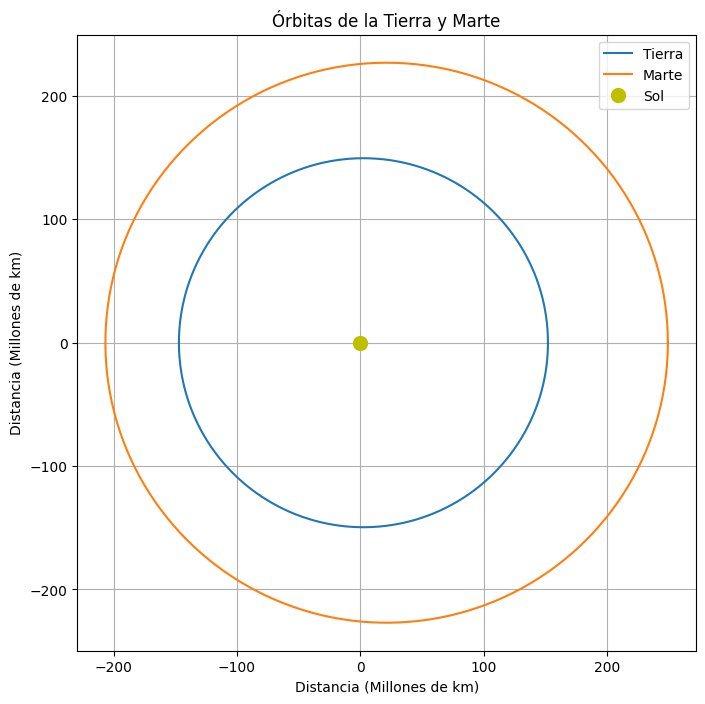

In [4]:
# prompt: representa las dos elipses y situa el sol

import matplotlib.pyplot as plt
import numpy as np

# Datos de la Tierra
semi_eje_mayor_tierra = 149.6  # Millones de km
excentricidad_tierra = 0.0167
distancia_foco_tierra = semi_eje_mayor_tierra * excentricidad_tierra
semi_eje_menor_tierra = semi_eje_mayor_tierra * np.sqrt(1 - excentricidad_tierra**2)

# Datos de Marte
semi_eje_mayor_marte = 228.0  # Millones de km
excentricidad_marte = 0.0934
distancia_foco_marte = semi_eje_mayor_marte * excentricidad_marte
semi_eje_menor_marte = semi_eje_mayor_marte * np.sqrt(1 - excentricidad_marte**2)

# Crear la gráfica
plt.figure(figsize=(8, 8))

# Graficar la elipse de la Tierra
theta = np.linspace(0, 2*np.pi, 360)
x_tierra = distancia_foco_tierra + semi_eje_mayor_tierra * np.cos(theta)
y_tierra = semi_eje_menor_tierra * np.sin(theta)
plt.plot(x_tierra, y_tierra, label='Tierra')

# Graficar la elipse de Marte
x_marte = distancia_foco_marte + semi_eje_mayor_marte * np.cos(theta)
y_marte = semi_eje_menor_marte * np.sin(theta)
plt.plot(x_marte, y_marte, label='Marte')

# Situar el Sol en el origen
plt.plot(0, 0, 'yo', markersize=10, label='Sol')

# Ajustar la gráfica
plt.xlabel('Distancia (Millones de km)')
plt.ylabel('Distancia (Millones de km)')
plt.title('Órbitas de la Tierra y Marte')
plt.legend()
plt.grid(True)
plt.gca().set_aspect('equal')  # Para que la elipse se vea proporcional
plt.show()


La ecuación de la elipse para Mercury es: (x - 11.90)^2 / (57.90)^2 + y^2 / (56.66)^2 = 1
La ecuación de la elipse para Venus es: (x - 0.74)^2 / (108.20)^2 + y^2 / (108.20)^2 = 1
La ecuación de la elipse para Earth es: (x - 2.50)^2 / (149.60)^2 + y^2 / (149.58)^2 = 1
La ecuación de la elipse para Mars es: (x - 21.30)^2 / (228.00)^2 + y^2 / (227.00)^2 = 1
La ecuación de la elipse para Jupiter es: (x - 37.68)^2 / (778.50)^2 + y^2 / (777.59)^2 = 1
La ecuación de la elipse para Saturn es: (x - 77.61)^2 / (1432.00)^2 + y^2 / (1429.90)^2 = 1
La ecuación de la elipse para Uranus es: (x - 135.46)^2 / (2870.00)^2 + y^2 / (2866.80)^2 = 1
La ecuación de la elipse para Neptune es: (x - 38.68)^2 / (4498.00)^2 + y^2 / (4497.83)^2 = 1


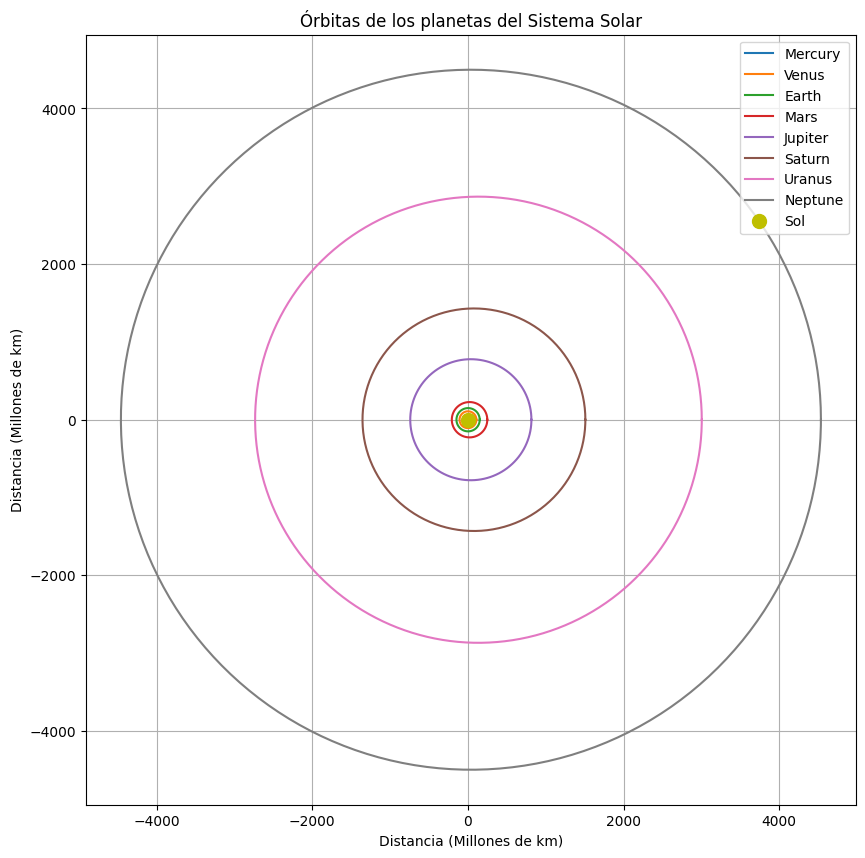

In [5]:
# prompt: calcula las ecuaciones de las elipses de todos los planetas del sistema solar

import numpy as np
import matplotlib.pyplot as plt

# Datos orbitales de los planetas (aproximados)
# Fuente: https://nssdc.gsfc.nasa.gov/planetary/factsheet/
planetary_data = {
    'Mercury': {'a': 57.9, 'e': 0.2056},
    'Venus': {'a': 108.2, 'e': 0.0068},
    'Earth': {'a': 149.6, 'e': 0.0167},
    'Mars': {'a': 228.0, 'e': 0.0934},
    'Jupiter': {'a': 778.5, 'e': 0.0484},
    'Saturn': {'a': 1432.0, 'e': 0.0542},
    'Uranus': {'a': 2870.0, 'e': 0.0472},
    'Neptune': {'a': 4498.0, 'e': 0.0086}
}

# Función para calcular la ecuación de la elipse
def ellipse_equation(a, e):
  b = a * np.sqrt(1 - e**2)
  c = a * e
  return f"(x - {c:.2f})^2 / ({a:.2f})^2 + y^2 / ({b:.2f})^2 = 1"

# Graficar las órbitas
plt.figure(figsize=(10, 10))

for planet, data in planetary_data.items():
  a = data['a']
  e = data['e']
  b = a * np.sqrt(1 - e**2)
  c = a * e
  theta = np.linspace(0, 2*np.pi, 360)
  x = c + a * np.cos(theta)
  y = b * np.sin(theta)
  plt.plot(x, y, label=planet)
  print(f"La ecuación de la elipse para {planet} es: {ellipse_equation(a,e)}")

plt.plot(0, 0, 'yo', markersize=10, label='Sol')
plt.xlabel('Distancia (Millones de km)')
plt.ylabel('Distancia (Millones de km)')
plt.title('Órbitas de los planetas del Sistema Solar')
plt.legend()
plt.grid(True)
plt.gca().set_aspect('equal')
plt.show()


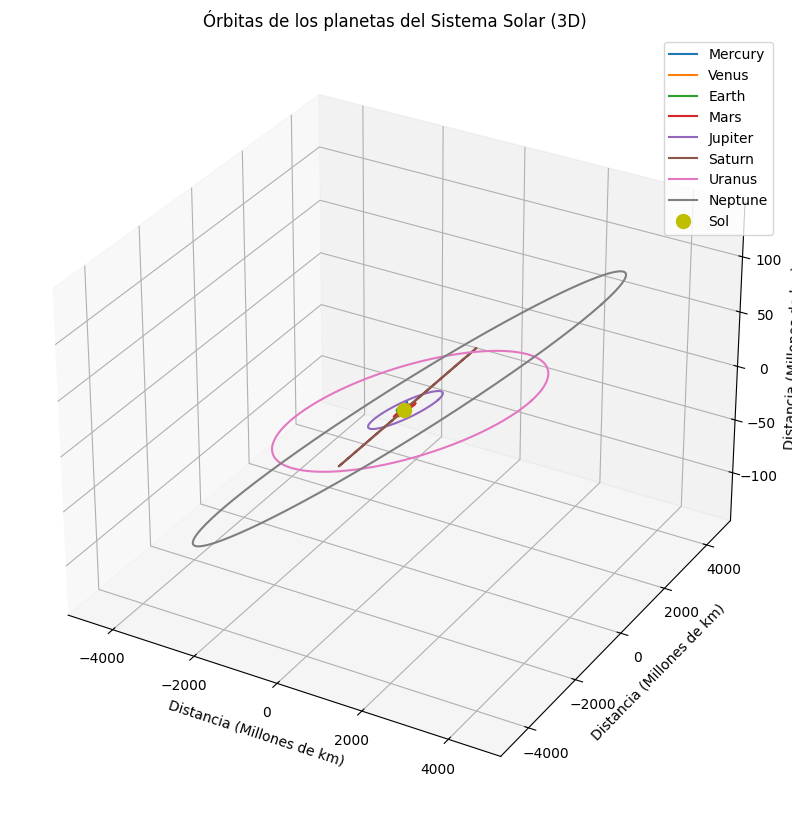

In [6]:
# prompt: calcula las ecuaciones de las elipses de todos los planetas del sistema solar y representalas en 3d

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Datos orbitales de los planetas (aproximados)
# Fuente: https://nssdc.gsfc.nasa.gov/planetary/factsheet/
planetary_data = {
    'Mercury': {'a': 57.9, 'e': 0.2056, 'i': 7.0},
    'Venus': {'a': 108.2, 'e': 0.0068, 'i': 3.4},
    'Earth': {'a': 149.6, 'e': 0.0167, 'i': 0.0},
    'Mars': {'a': 228.0, 'e': 0.0934, 'i': 1.8},
    'Jupiter': {'a': 778.5, 'e': 0.0484, 'i': 1.3},
    'Saturn': {'a': 1432.0, 'e': 0.0542, 'i': 2.5},
    'Uranus': {'a': 2870.0, 'e': 0.0472, 'i': 0.8},
    'Neptune': {'a': 4498.0, 'e': 0.0086, 'i': 1.8}
}

# Crear la figura 3D
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Graficar las órbitas
for planet, data in planetary_data.items():
    a = data['a']
    e = data['e']
    i = data['i']  # Inclinación orbital en grados
    b = a * np.sqrt(1 - e**2)
    c = a * e
    theta = np.linspace(0, 2*np.pi, 360)
    x = c + a * np.cos(theta)
    y = b * np.sin(theta)

    # Aplicar la inclinación
    z = np.zeros_like(x)
    x_rotated = x * np.cos(np.radians(i)) - z * np.sin(np.radians(i))
    z_rotated = x * np.sin(np.radians(i)) + z * np.cos(np.radians(i))

    ax.plot(x_rotated,y,z_rotated, label=planet)

# Situar el Sol en el origen
ax.plot([0], [0], [0], 'yo', markersize=10, label='Sol')


# Ajustar la gráfica
ax.set_xlabel('Distancia (Millones de km)')
ax.set_ylabel('Distancia (Millones de km)')
ax.set_zlabel('Distancia (Millones de km)')
ax.set_title('Órbitas de los planetas del Sistema Solar (3D)')
ax.legend()
ax.grid(True)

plt.show()


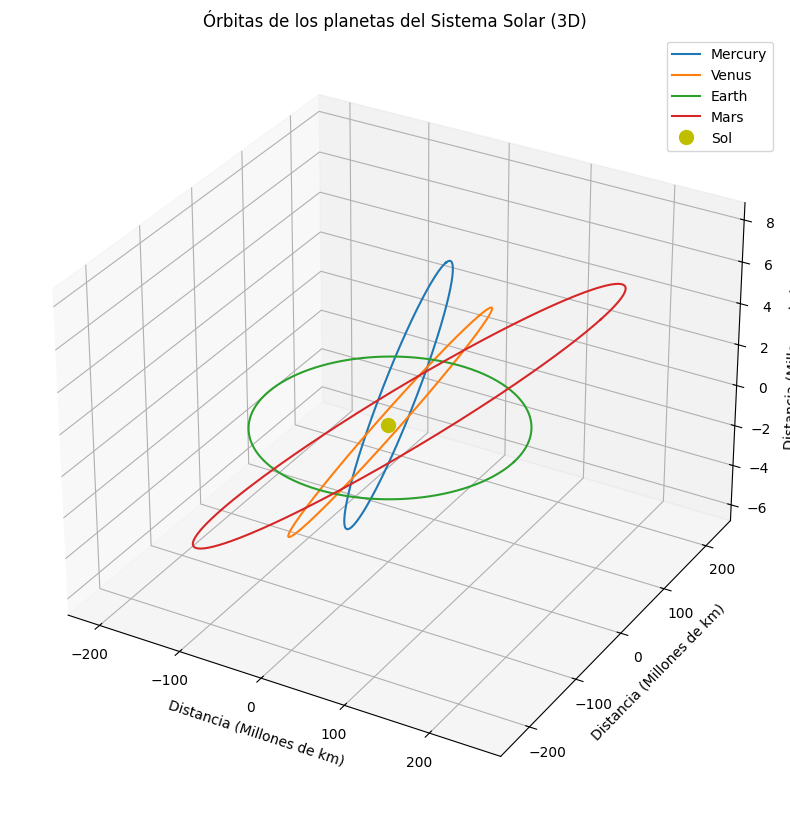

In [7]:
# prompt: calcula las ecuaciones de las elipses de mercurio venus la tierra y marte en torno al sol y representalas en 3d

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Datos orbitales de los planetas (aproximados)
# Fuente: https://nssdc.gsfc.nasa.gov/planetary/factsheet/
planetary_data = {
    'Mercury': {'a': 57.9, 'e': 0.2056, 'i': 7.0},
    'Venus': {'a': 108.2, 'e': 0.0068, 'i': 3.4},
    'Earth': {'a': 149.6, 'e': 0.0167, 'i': 0.0},
    'Mars': {'a': 228.0, 'e': 0.0934, 'i': 1.8},
}

# Crear la figura 3D
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Graficar las órbitas
for planet, data in planetary_data.items():
    a = data['a']
    e = data['e']
    i = data['i']  # Inclinación orbital en grados
    b = a * np.sqrt(1 - e**2)
    c = a * e
    theta = np.linspace(0, 2*np.pi, 360)
    x = c + a * np.cos(theta)
    y = b * np.sin(theta)

    # Aplicar la inclinación
    z = np.zeros_like(x)
    x_rotated = x * np.cos(np.radians(i)) - z * np.sin(np.radians(i))
    z_rotated = x * np.sin(np.radians(i)) + z * np.cos(np.radians(i))

    ax.plot(x_rotated,y,z_rotated, label=planet)

# Situar el Sol en el origen
ax.plot([0], [0], [0], 'yo', markersize=10, label='Sol')


# Ajustar la gráfica
ax.set_xlabel('Distancia (Millones de km)')
ax.set_ylabel('Distancia (Millones de km)')
ax.set_zlabel('Distancia (Millones de km)')
ax.set_title('Órbitas de los planetas del Sistema Solar (3D)')
ax.legend()
ax.grid(True)

plt.show()


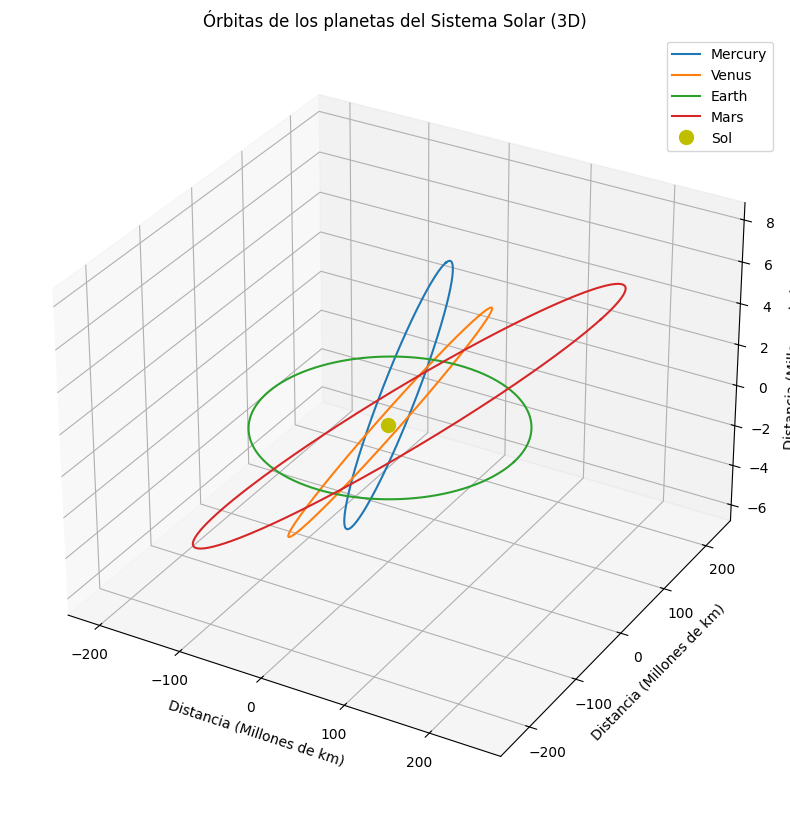

In [8]:
# prompt: calcula las ecuaciones de las elipses de mercurio venus la tierra y marte en torno al sol y representalas en 3d poniendo la tierra en plano horizontal

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Datos orbitales de los planetas (aproximados)
# Fuente: https://nssdc.gsfc.nasa.gov/planetary/factsheet/
planetary_data = {
    'Mercury': {'a': 57.9, 'e': 0.2056, 'i': 7.0},
    'Venus': {'a': 108.2, 'e': 0.0068, 'i': 3.4},
    'Earth': {'a': 149.6, 'e': 0.0167, 'i': 0.0},
    'Mars': {'a': 228.0, 'e': 0.0934, 'i': 1.8},
}

# Crear la figura 3D
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Graficar las órbitas
for planet, data in planetary_data.items():
    a = data['a']
    e = data['e']
    i = data['i']  # Inclinación orbital en grados
    b = a * np.sqrt(1 - e**2)
    c = a * e
    theta = np.linspace(0, 2*np.pi, 360)
    x = c + a * np.cos(theta)
    y = b * np.sin(theta)

    # Aplicar la inclinación
    z = np.zeros_like(x)
    x_rotated = x * np.cos(np.radians(i)) - z * np.sin(np.radians(i))
    z_rotated = x * np.sin(np.radians(i)) + z * np.cos(np.radians(i))

    #Rotar la Tierra para que este en el plano horizontal
    if planet == 'Earth':
        x_rotated = x
        z_rotated = z


    ax.plot(x_rotated, y, z_rotated, label=planet)

# Situar el Sol en el origen
ax.plot([0], [0], [0], 'yo', markersize=10, label='Sol')

# Ajustar la gráfica
ax.set_xlabel('Distancia (Millones de km)')
ax.set_ylabel('Distancia (Millones de km)')
ax.set_zlabel('Distancia (Millones de km)')
ax.set_title('Órbitas de los planetas del Sistema Solar (3D)')
ax.legend()
ax.grid(True)

plt.show()


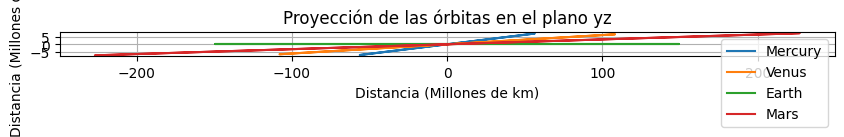

In [9]:
# prompt:  calcula las ecuaciones de las elipses de mercurio venus la tierra y marte en torno al sol y representalas proyectandolas en el plano  yz

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Datos orbitales de los planetas (aproximados)
# Fuente: https://nssdc.gsfc.nasa.gov/planetary/factsheet/
planetary_data = {
    'Mercury': {'a': 57.9, 'e': 0.2056, 'i': 7.0},
    'Venus': {'a': 108.2, 'e': 0.0068, 'i': 3.4},
    'Earth': {'a': 149.6, 'e': 0.0167, 'i': 0.0},
    'Mars': {'a': 228.0, 'e': 0.0934, 'i': 1.8},
}

# Crear la figura 2D (proyección en el plano yz)
plt.figure(figsize=(10, 10))

# Graficar las órbitas
for planet, data in planetary_data.items():
    a = data['a']
    e = data['e']
    i = data['i']  # Inclinación orbital en grados
    b = a * np.sqrt(1 - e**2)
    c = a * e
    theta = np.linspace(0, 2*np.pi, 360)
    x = c + a * np.cos(theta)
    y = b * np.sin(theta)

    # Proyección en el plano yz (ignoramos x)
    # Aplicamos la inclinación en el plano yz

    z = np.zeros_like(x)  # Inicializamos z como cero para la proyección

    # Rotación para la inclinación en el plano yz
    y_rotated = y * np.cos(np.radians(i)) - z * np.sin(np.radians(i))
    z_rotated = y * np.sin(np.radians(i)) + z * np.cos(np.radians(i))


    plt.plot(y_rotated, z_rotated, label=planet)

# Ajustar la gráfica
plt.xlabel('Distancia (Millones de km)')
plt.ylabel('Distancia (Millones de km)')
plt.title('Proyección de las órbitas en el plano yz')
plt.legend()
plt.grid(True)
plt.gca().set_aspect('equal')  # Para que la elipse se vea proporcional
plt.show()


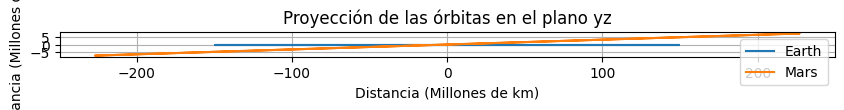

In [10]:
# prompt: calcula las ecuaciones de las elipses de la tierra y marte en torno al sol y representalas proyectandolas en el plano  yz

import numpy as np
import matplotlib.pyplot as plt

# Datos orbitales de la Tierra y Marte
planetary_data = {
    'Earth': {'a': 149.6, 'e': 0.0167, 'i': 0.0},
    'Mars': {'a': 228.0, 'e': 0.0934, 'i': 1.8},
}

# Crear la figura 2D (proyección en el plano yz)
plt.figure(figsize=(10, 10))

# Graficar las órbitas
for planet, data in planetary_data.items():
    a = data['a']
    e = data['e']
    i = data['i']  # Inclinación orbital en grados
    b = a * np.sqrt(1 - e**2)
    c = a * e
    theta = np.linspace(0, 2*np.pi, 360)
    x = c + a * np.cos(theta)
    y = b * np.sin(theta)

    # Proyección en el plano yz (ignoramos x)
    # Aplicamos la inclinación en el plano yz

    z = np.zeros_like(x)  # Inicializamos z como cero para la proyección

    # Rotación para la inclinación en el plano yz
    y_rotated = y * np.cos(np.radians(i)) - z * np.sin(np.radians(i))
    z_rotated = y * np.sin(np.radians(i)) + z * np.cos(np.radians(i))

    plt.plot(y_rotated, z_rotated, label=planet)

# Ajustar la gráfica
plt.xlabel('Distancia (Millones de km)')
plt.ylabel('Distancia (Millones de km)')
plt.title('Proyección de las órbitas en el plano yz')
plt.legend()
plt.grid(True)
plt.gca().set_aspect('equal')  # Para que la elipse se vea proporcional
plt.show()
